# 2-1. Computer Vision Basic

## Computer Vision 종류

### 1. Image Classification
- 지원모델
  - ResNet, MobileNet, DenseNet, VGG, ...
-  <img src='https://cv.gluon.ai/_static/image-classification.png' />

### 2. Object Detection
- 지원모델
  - Faster RCNN, SSD, Yolo-v3
- <img src='https://cv.gluon.ai/_static/object-detection.png' />

### 3. Semantic Segmentation
- 지원모델
  - FCN, PSP, DeepLab_v3
- <img src='https://cv.gluon.ai/_static/semantic-segmentation.png' />

### 4. Instance Segmentation
- 지원모델
  - Mask RCNN
- <img src='https://cv.gluon.ai/_static/instance-segmentation.png' />

### 5. Pose Estimation
- 지원모델
  - Simple Pose
- <img src='https://cv.gluon.ai/_static/pose-estimation.svg' width=638px   /> 
 

### 6. Video Action REcognition
- 지원모델
  - TSN, i3D, Non-local, SlowFast
- <img src='https://cv.gluon.ai/_static/action-recognition.png' width=638px />

### 7. Depth Prediction
- 지원모델
  - Monodepth2
- <img src='https://github.com/dmlc/gluon-cv/raw/master/docs/_static/depth.png'  width=638px />

### 8. Object Tracking
- 지원모델
  - SiamRPN, SMOT
- <img src='https://cv.gluon.ai/_static/smot_demo.gif'  width=638px />


--------------------

## Neural Network

- 각각의 화살표마다 가중치값이 적용되며, 학습 시 해당 값에 대하여 값을 설정하면서 학습한다
<img src='https://sites.google.com/site/ticketlabdocumentation/_/rsrc/1524654219496/computer-vision/neural_net2.jpeg' width=100%>

## image에서 특징을 추출 하기

<img src='https://static.news.zumst.com/images/43/2017/08/10/4ef3dd3f75444118b9cfce45fd2a52f7.jpg' >

### image download

In [1]:
!curl https://static.news.zumst.com/images/43/2017/08/10/4ef3dd3f75444118b9cfce45fd2a52f7.jpg > son.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28540  100 28540    0     0  29453      0 --:--:-- --:--:-- --:--:-- 29422


### image load

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [3]:
img_org = load_img('./son.png')

In [4]:
img_org = img_to_array(img_org) 
img_org.shape

(600, 600, 3)

In [5]:
img = load_img('./son.png', target_size=(250, 250))

In [6]:
250*250*3

187500

특징을 유지한채로 128 개의 array에 담아내기!

In [7]:
type(img)

PIL.Image.Image

### ndarray 형태로 변환

In [8]:
 img = img_to_array(img) 

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(250, 250, 3)

In [11]:
img

array([[[188., 190., 202.],
        [188., 190., 202.],
        [188., 190., 202.],
        ...,
        [171., 174., 183.],
        [171., 174., 183.],
        [171., 174., 183.]],

       [[188., 190., 202.],
        [188., 190., 202.],
        [188., 190., 202.],
        ...,
        [171., 174., 183.],
        [171., 174., 183.],
        [171., 174., 183.]],

       [[188., 190., 202.],
        [188., 190., 202.],
        [188., 190., 202.],
        ...,
        [171., 174., 183.],
        [171., 174., 183.],
        [171., 174., 183.]],

       ...,

       [[195., 199., 208.],
        [195., 199., 208.],
        [195., 199., 208.],
        ...,
        [147., 153., 165.],
        [147., 153., 165.],
        [146., 152., 164.]],

       [[195., 199., 208.],
        [195., 199., 208.],
        [195., 199., 208.],
        ...,
        [147., 153., 165.],
        [147., 153., 165.],
        [146., 152., 164.]],

       [[195., 199., 208.],
        [195., 199., 208.],
        [195., 1

- normallize(0~1)

In [12]:
img /= 255.

In [13]:
img

array([[[0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        ...,
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ]],

       [[0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        ...,
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ]],

       [[0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        [0.7372549 , 0.74509805, 0.7921569 ],
        ...,
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ],
        [0.67058825, 0.68235296, 0.7176471 ]],

       ...,

       [[0.7647059 , 0.78039217, 0.8156863 ],
        [0.7647059 , 0.78039217, 0.8156863 ],
        [0.7647059 , 0

### 변환된 데이터를 pyplot으로 확인하기

In [14]:
import matplotlib.pyplot as plt

In [15]:
 plt.rcParams['figure.figsize'] = (10, 10) # set figure size

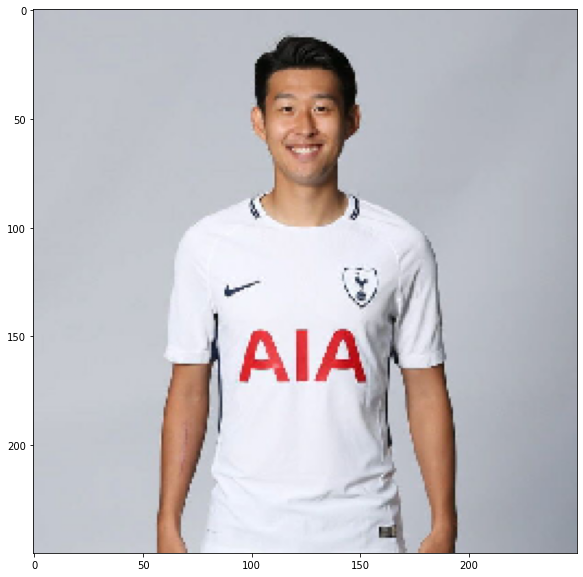

In [16]:
 plt.imshow(img)
 plt.show()

### convolution

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models

- input_shape 과 마지막 layer의 shape이 중요합니다

<img src='https://cezannec.github.io/assets/cnn_intro/CNN_ex.png' width=100% />

In [18]:
model = models.Sequential() 
model.add(layers.InputLayer(input_shape=(250,250,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               30482560  
Total params: 30,501,952
Trainable params: 30,501,952
Non-trainable params: 0
____________________________________________

In [20]:
img = expand_dims(img, axis=0)

In [21]:
img.shape

(1, 250, 250, 3)

- 참고 : [how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [22]:
feature_maps = model.predict(img)

In [23]:
feature_maps.shape

(1, 128)

In [24]:
feature_maps.reshape(128)

array([0.170383  , 0.        , 0.0459097 , 0.        , 0.19862667,
       0.10642939, 0.1227645 , 0.07036267, 0.        , 0.        ,
       0.07541052, 0.15655312, 0.        , 0.23595542, 0.02700287,
       0.33693776, 0.        , 0.03147428, 0.22211665, 0.        ,
       0.17703143, 0.12354991, 0.04591892, 0.01518628, 0.        ,
       0.1516832 , 0.        , 0.        , 0.        , 0.02885579,
       0.        , 0.        , 0.        , 0.29458016, 0.26901838,
       0.25019562, 0.09064079, 0.00189218, 0.1369171 , 0.16522187,
       0.14369702, 0.18749791, 0.        , 0.        , 0.1603178 ,
       0.        , 0.05753745, 0.        , 0.        , 0.00443613,
       0.        , 0.        , 0.09177294, 0.3101793 , 0.17348912,
       0.        , 0.        , 0.06668472, 0.08924548, 0.18485436,
       0.27495074, 0.08943026, 0.09513498, 0.08822294, 0.        ,
       0.        , 0.        , 0.        , 0.12737904, 0.41799733,
       0.18102638, 0.        , 0.        , 0.18110101, 0.06200

### 분류기 만들기

In [25]:
model2 = models.Sequential()
model2.add(layers.InputLayer(input_shape=(250, 250, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Flatten()) 
model2.add(layers.Dense(10, activation='softmax'))

In [26]:
feature_maps2 = model2.predict(img)

In [27]:
feature_maps2.shape

(1, 10)

In [28]:
feature_maps2.reshape(10)

array([0.10161756, 0.08779899, 0.10413536, 0.09804672, 0.11015927,
       0.11019863, 0.10535953, 0.07392069, 0.08878244, 0.11998081],
      dtype=float32)

## 기존의 모델을 이용하여 특징 추출하기
- [keras available models](https://keras.io/api/applications/)
- [imagenet](http://www.image-net.org/)
- [imagenet models architecture](https://www.researchgate.net/profile/Tiago_Carvalho13/publication/330478807/figure/fig1/AS:756995804110849@1557493272678/VGG16-VGG19-Inception-V3-Xception-and-ResNet-50-architectures.ppm)

### resnet50

In [29]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocessing
from keras.applications.resnet50 import decode_predictions as resnet50_decode

#### residual network
<img src='https://miro.medium.com/max/546/1*5zSgo2L71FJos8XendgCvQ.jpeg' />

#### resnet50 framework
<img src='https://www.medrxiv.org/content/medrxiv/early/2020/11/12/2020.11.08.20227819/F3.large.jpg?width=800&height=600&carousel=1'>

#### resnet50 layers
<img src='https://iq.opengenus.org/content/images/2020/03/Screenshot-from-2020-03-20-15-49-54.png' width=100% />
  - FLOPs = Floating point operations

In [30]:
model_resnet_50 = ResNet50()

102973440/102967424 [==============================] - 2s 0us/step


#### image test

In [31]:
!curl https://sbybiz.org/app/uploads/2014/06/soccer-ball-300x200.jpg > ball.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21809  100 21809    0     0  46303      0 --:--:-- --:--:-- --:--:-- 46303


<img src="https://sbybiz.org/app/uploads/2014/06/soccer-ball-300x200.jpg" />

In [32]:
img = load_img('./ball.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = resnet50_preprocessing(x)

In [33]:
preds_resnet_50 = model_resnet_50.predict(x)

In [34]:
print('predicated:', resnet50_decode(preds_resnet_50, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
predicated: [('n04254680', 'soccer_ball', 0.999905), ('n04540053', 'volleyball', 1.6411299e-05), ('n03134739', 'croquet_ball', 1.4350643e-05)]


### VGG16

In [35]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [36]:
model_vgg16 = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 8s 0us/step


#### VGG16 architecture
<img src='https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg' width=100% />

#### VGG16 layers
<img src='https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg'   />

In [37]:
img_path = './ball.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [38]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [39]:
preds_vgg16 = model_vgg16.predict(x)

In [40]:
preds_vgg16.shape

(1, 1000)

In [41]:
# decode_predictions(features[0])
print('predicated:', decode_predictions(preds_vgg16, top=3)[0])

predicated: [('n04254680', 'soccer_ball', 0.99999917), ('n04540053', 'volleyball', 3.150363e-07), ('n03445777', 'golf_ball', 2.3648246e-07)]


### VGG16 custom - top(분류부분) 제거

In [42]:
model_vgg16_custom = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [43]:
model_vgg16_custom.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [44]:
preds_vgg16_custom = model_vgg16_custom.predict(x)

In [45]:
preds_vgg16_custom.shape

(1, 7, 7, 512)

### VGG16 custom - 원하는 layer 출력까지만 

In [46]:
model_vgg16 = VGG16(weights='imagenet')
model_vgg16_custom_fc2 = Model(inputs=model_vgg16.input, outputs=model_vgg16.get_layer('fc2').output)

In [47]:
model_vgg16_custom_fc2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
features_custom_fc2 = model_vgg16_custom_fc2.predict(x)

In [49]:
features_custom_fc2.shape

(1, 4096)

### VGG16 custom - 10개 추출

In [50]:
from tensorflow.keras.layers import Dense

#### base layer

In [51]:
model_vgg16 = VGG16(weights='imagenet')
model_vgg16_custom_fc2 = Model(inputs=model_vgg16.input, outputs=model_vgg16.get_layer('fc2').output)

#### output layer design

In [52]:
x = model_vgg16_custom_fc2.output

In [53]:
x = Dense(512, activation='relu')(x)

In [54]:
x = Dense(64, activation='relu')(x)

In [55]:
predictions = Dense(10, activation='softmax')(x)

In [56]:
model_vgg16_custom_class10 = Model(inputs=model_vgg16_custom_fc2.input, outputs=predictions)

In [57]:
model_vgg16_custom_class10.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### 학습필요
- 새로 추가된 output layer에 대해서는 학습된 데이터가 없습니다
- 이런 형태의 학습을 transfer learning  이라고 합니다

1. 기존에 존재하던 layer는 별도 학습되지않도록 설정

In [59]:
for layer in model_vgg16_custom_fc2.layers:
    layer.trainable = False

2. 모델을 compile(초기화) 해 줍니다

In [60]:
model_vgg16_custom_class10.compile(optimizer='rmsprop', loss='categorical_crossentropy')

3. 데이터들을 준비해서 학습해주는 과정이 필요합니다
  - 10개의 class를 정의했으니 10개의 유형의 데이터를 준비해서 
  - 학습시킵니다

In [61]:
# model_vgg16_custom_class10.fit(...)

4. 학습이 다 되면 사용하면 됩니다

In [63]:
# features_custom_class10 = model_vgg16_custom_class10.predict(x)